In [1]:
from school_analysis.preprocessing.load import Loader
import pandas as pd


loader = Loader()
df_melted = loader.load('no_hauptschulabschluss')
df_melted['year'] = pd.to_datetime(df_melted['year'], format='%Y')
df_melted['total'] = pd.to_numeric(df_melted['total'], errors='coerce')
total_students_by_year = df_melted.groupby('year')['total'].sum()

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
child_amount_per_year = children_state.groupby('year')['Value'].sum()

df_no_hauptschulabschluss = pd.merge(total_students_by_year, child_amount_per_year, on='year')
df_no_hauptschulabschluss['relative'] = df_no_hauptschulabschluss['total']/df_no_hauptschulabschluss['Value']
df_no_hauptschulabschluss

,total,Value,relative
year,,,
1998-01-01,655234.0,22080272.0,0.029675
1999-01-01,677697.0,23636296.0,0.028672
2000-01-01,693118.0,23398508.0,0.029622
2001-01-01,661708.0,23175214.0,0.028552
2002-01-01,652647.0,23067396.0,0.028293
2003-01-01,632157.0,23114328.0,0.027349
2004-01-01,598069.0,22808026.0,0.026222
2005-01-01,581089.0,22594310.0,0.025718
2006-01-01,533897.0,22228000.0,0.024019


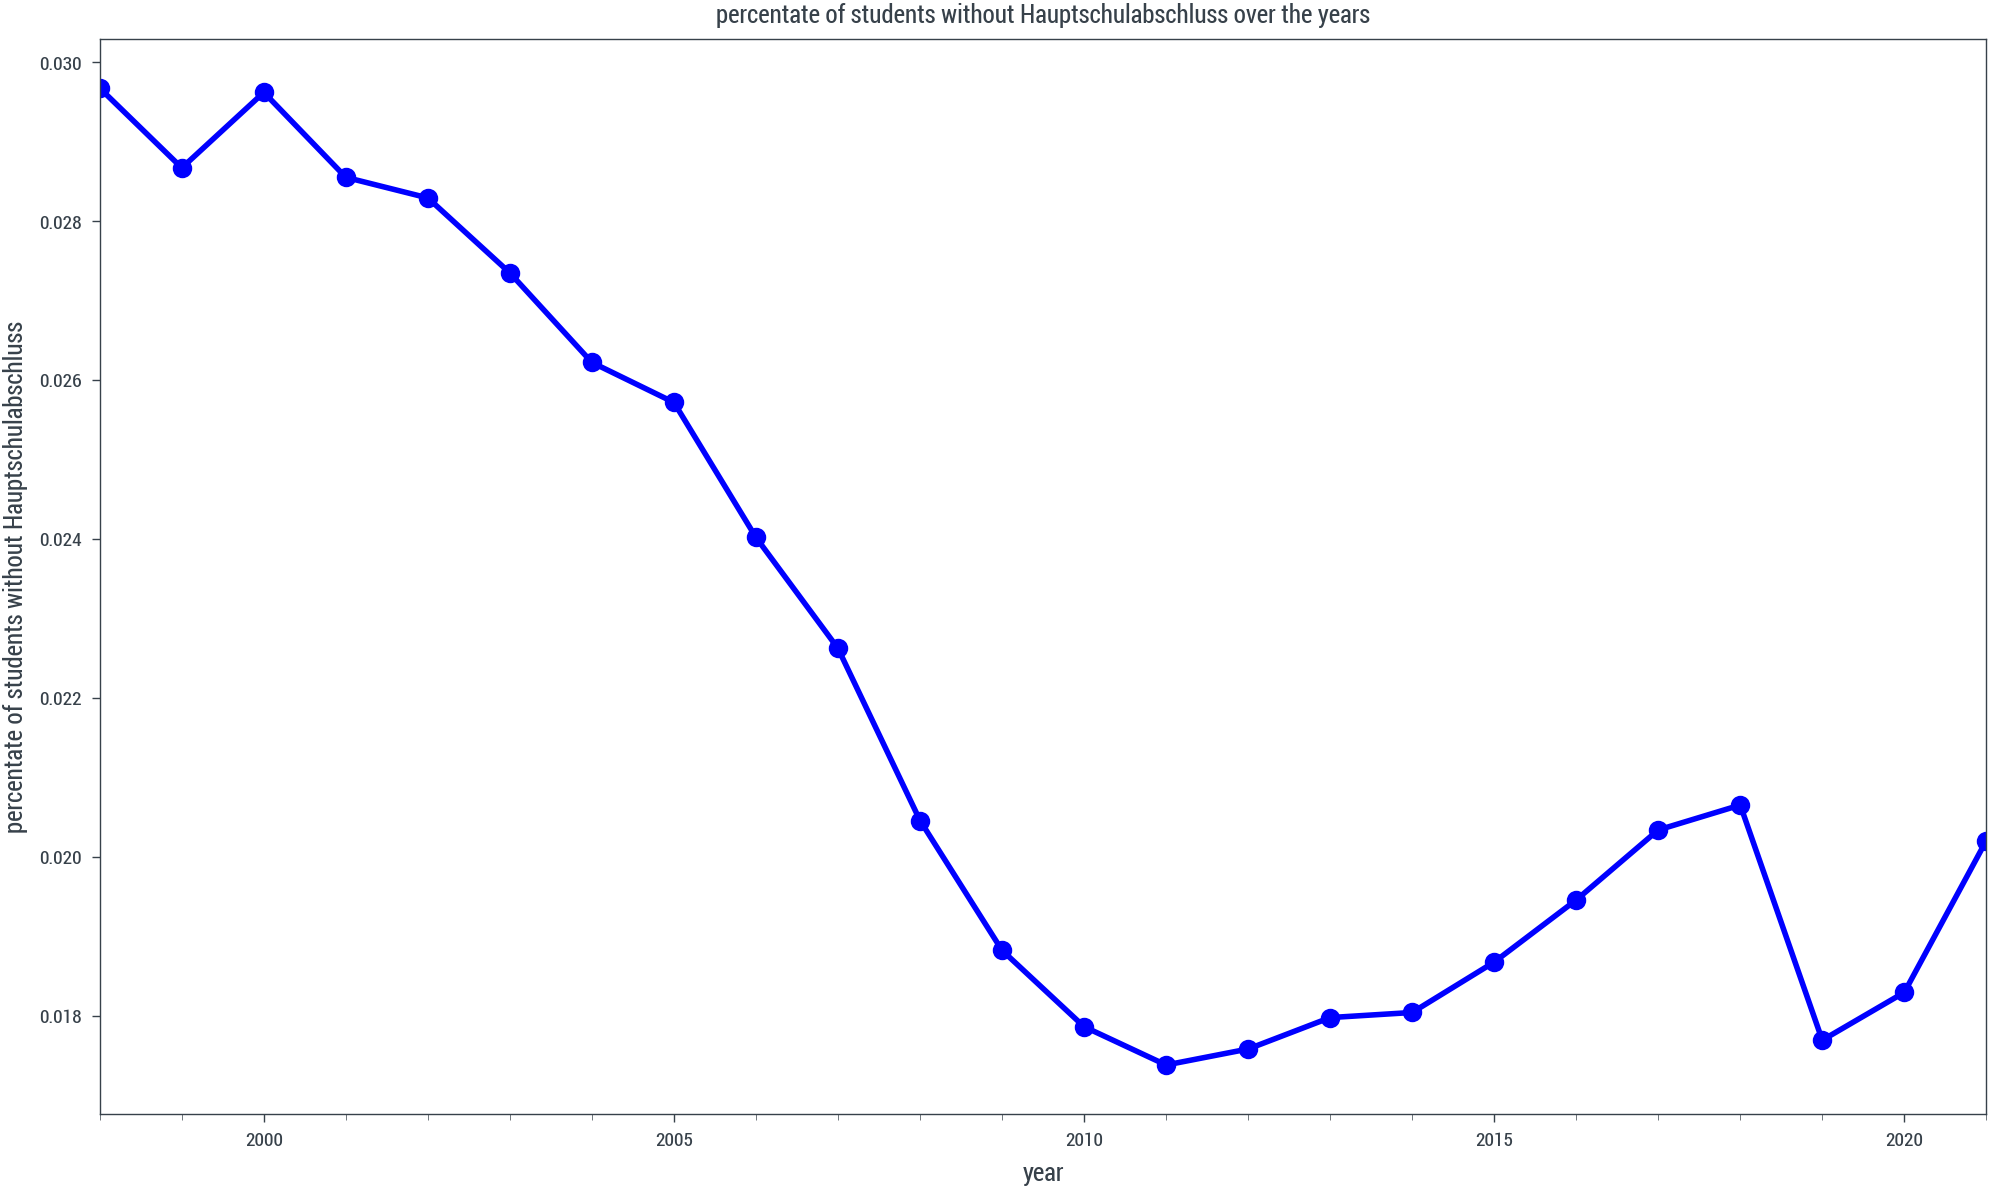

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_no_hauptschulabschluss['relative'].plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('percentate of students without Hauptschulabschluss over the years')
plt.xlabel('year')
plt.ylabel('percentate of students without Hauptschulabschluss')
plt.show()

# Repeaters and people without Hauptschulabschluss in one plot

C:\Users\jonas\AppData\Local\Temp\ipykernel_29644\1762625897.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


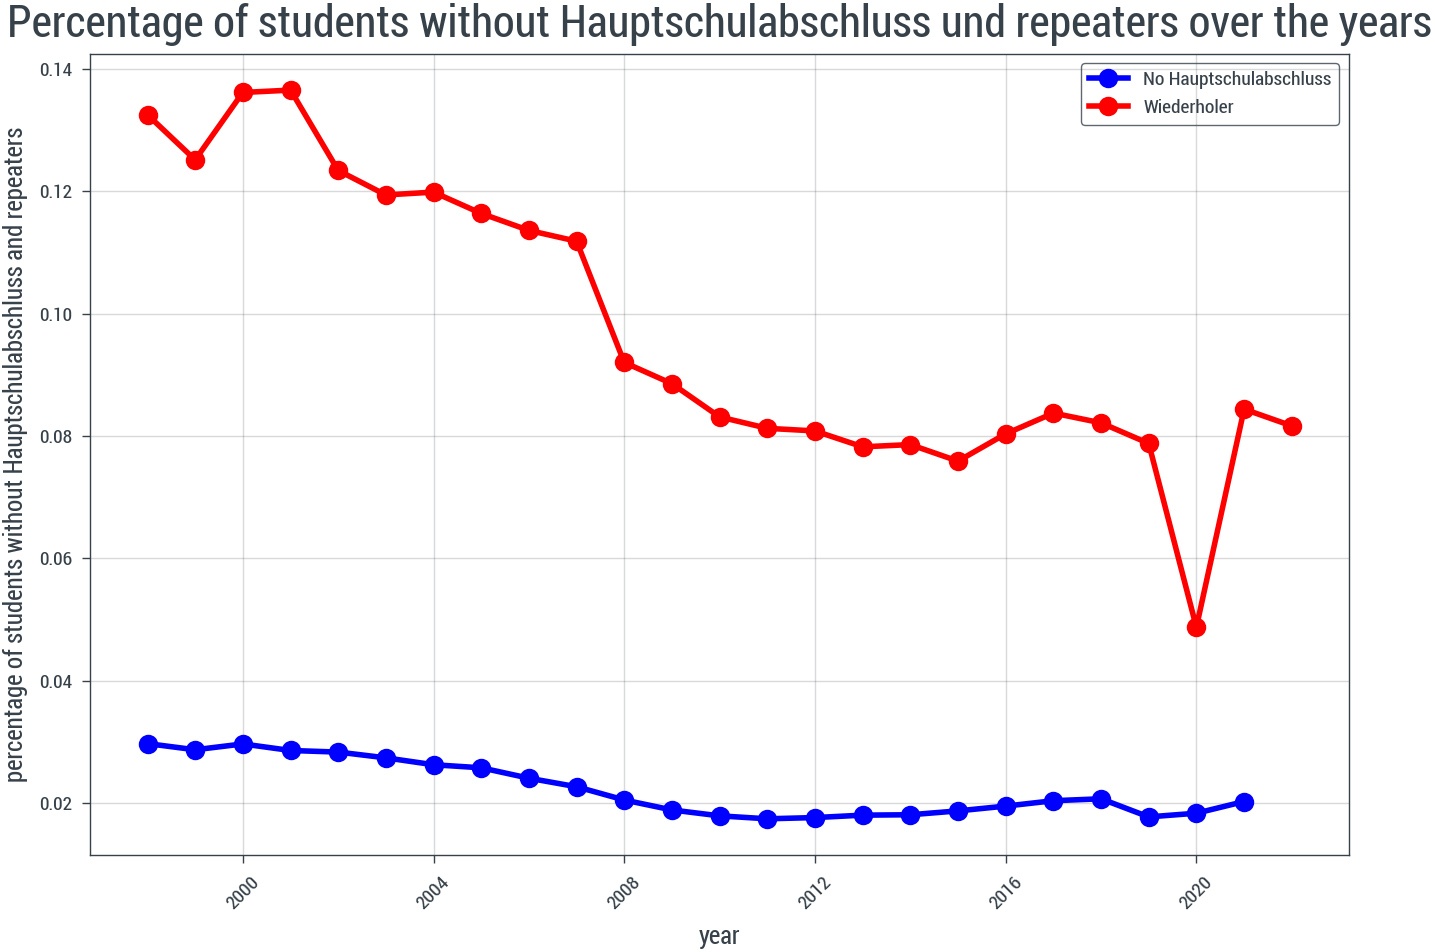

In [6]:
from school_analysis.preprocessing.load import Loader
import pandas as pd


loader = Loader()
melted_df = loader.load('number_of_repeaters')


melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
total_over_years = melted_df.groupby('year')['total'].sum()

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
child_amount_per_year = children_state.groupby('year')['Value'].sum()

df_repeaters = pd.merge(total_over_years, child_amount_per_year, on='year')
df_repeaters['relative'] = df_repeaters['total']/df_repeaters['Value'] 



import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(df_no_hauptschulabschluss.index, df_no_hauptschulabschluss['relative'], 
        marker='o', color='blue', linewidth=2, label='No Hauptschulabschluss')

ax.plot(df_repeaters.index, df_repeaters['relative'], 
        marker='o', color='red', linewidth=2, label='Wiederholer')

ax.set_title('Percentage of students without Hauptschulabschluss und repeaters over the years', fontsize=13)
ax.set_xlabel('year')
ax.set_ylabel('percentage of students without Hauptschulabschluss and repeaters')

ax.legend()

ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Anzeigen des Plots
plt.show()
